In [1]:
# import dependencies
import pandas as pd
import numpy as np
import json
import csv
import os
import time
from config import api_key_meetup
from pandas.io.json import json_normalize
import requests
import logging
import matplotlib.pyplot as plt
import seaborn as sns
#pd.DataFrame.from_dict(json_normalize(list), orient='columns')

-----------
### groups
-----------

In [6]:
#load the df_census to a a pandas dataframe
result = {}

filepath = os.path.join("data_output","df_census.csv")

with open(filepath,'r') as f:
    reader = csv.DictReader(f,delimiter=',')
    for row in reader:
        for column, value in row.items():
            result.setdefault(column, []).append(value)
            
df_census = pd.DataFrame.from_dict(result)
display(df_census.head())
display(df_census.shape)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,Diversity_score,Educational_score,GEOID,INTPTLAT,INTPTLONG,Median_age,Median_household_income,population
0,166659745,64.348,799293,0.309,0.057057057057057055,3.1731335746149316,00601,18.180555,-66.749961 ...,37.6,10816,17982
1,79307535,30.621,4428428,1.71,0.42513661202185793,3.425240253853128,00602,18.361945,-67.175597 ...,39.5,16079,40260
2,81884707,31.616,183895,0.071,0.30970462524805376,3.5349691203471876,00603,18.455183,-67.119887 ...,39.9,16804,52408
3,109579998,42.309,12487,0.005,0.30516506081187805,2.6999293951518006,00606,18.158345,-66.932911 ...,40.8,12512,6331
4,93013427,35.913,4172060,1.611,0.37196413442530357,3.203646942698322,00610,18.295366,-67.125135 ...,40.2,17475,28328


(32157, 12)

In [7]:
# rename the column names in df_census
new = []

#loop through each column and append "census_" to the beginning
for name in df_census.columns:
    new.append("census_"+ name.lower())

df_census.columns = new
df_census.head()

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population
0,166659745,64.348,799293,0.309,0.057057057057057055,3.1731335746149316,00601,18.180555,-66.749961 ...,37.6,10816,17982
1,79307535,30.621,4428428,1.71,0.42513661202185793,3.425240253853128,00602,18.361945,-67.175597 ...,39.5,16079,40260
2,81884707,31.616,183895,0.071,0.30970462524805376,3.5349691203471876,00603,18.455183,-67.119887 ...,39.9,16804,52408
3,109579998,42.309,12487,0.005,0.30516506081187805,2.6999293951518006,00606,18.158345,-66.932911 ...,40.8,12512,6331
4,93013427,35.913,4172060,1.611,0.37196413442530357,3.203646942698322,00610,18.295366,-67.125135 ...,40.2,17475,28328


In [12]:
df_census.iloc[105:110,:]

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population
105,62578786,24.162,1047991,0.405,0.268881,4.570691,00926,18.3454,-66.051545 ...,40.8,32636,104645
106,6803686,2.627,5830,0.002,0.122171,5.126368,00927,18.388011,-66.072089 ...,46.8,30507,14447
107,1940428,0.749,26786,0.01,0.835821,7.000000,00934,18.411313,-66.124234 ...,38.7,65938,67
108,417954,0.161,0,0.,0.281806,2.576653,00936,18.395463,-66.073772 ...,59.2,-,731
109,45535083,17.581,2112065,0.815,0.462433,3.818139,00949,18.430696,-66.212833 ...,37.7,24400,78552


In [14]:
# Convert argument to a numeric type
df_census['census_population'] = pd.to_numeric(df_census['census_population'],errors='coerce')
df_census['census_diversity_score'] = pd.to_numeric(df_census['census_diversity_score'],errors='coerce')
df_census['census_educational_score'] = pd.to_numeric(df_census['census_educational_score'],errors='coerce')
df_census['census_median_age'] = pd.to_numeric(df_census['census_median_age'],errors='coerce')
df_census['census_median_household_income'] = pd.to_numeric(df_census['census_median_household_income'],errors='coerce')

In [16]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32157 entries, 0 to 32156
Data columns (total 12 columns):
census_aland                      32157 non-null object
census_aland_sqmi                 32157 non-null object
census_awater                     32157 non-null object
census_awater_sqmi                32157 non-null object
census_diversity_score            31847 non-null float64
census_educational_score          31816 non-null float64
census_geoid                      32157 non-null object
census_intptlat                   32157 non-null object
census_intptlong                  32157 non-null object
census_median_age                 31652 non-null float64
census_median_household_income    31050 non-null float64
census_population                 32157 non-null int64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.9+ MB


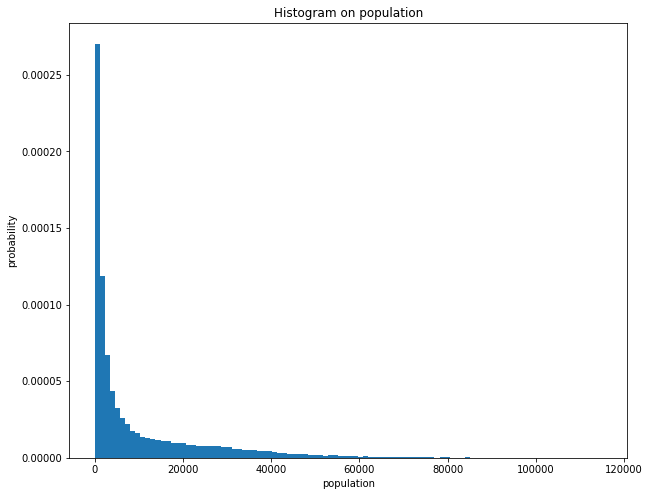

In [17]:
# draw a histogram to see the distribution of population
plt.figure(figsize=(10,8))
plt.hist(df_census['census_population'],bins=100,normed=True)
plt.title('Histogram on population')
plt.ylabel('probability')
plt.xlabel('population')
plt.show();

In [19]:
# Sell all zip codes with a population over 1000 from a set of randomly selected list of 1000 zctas locations 
df_census.dropna(axis=0,how='any',inplace=True)
selected_zctas = df_census[df_census['census_population'].astype(int) > 1000]
selected_zctas = df_census.sample(n=1000)

In [20]:
# Visualize
selected_zctas.head()

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population
316,53731552,20.746,2717798,1.049,0.233184,5.121376,01545,42.284767,-71.714228 ...,40.5,94273.0,35963
21952,118316345,45.682,972969,0.376,0.013807,3.839525,65075,38.237326,-92.250624 ...,37.9,64643.0,1014
31886,303225857,117.076,993181,0.383,0.132607,4.597581,99224,47.652359,-117.526002 ...,37.0,58789.0,21379
10024,86544801,33.415,740836,0.286,0.097513,4.536801,32128,29.100739,-81.071829 ...,51.5,64367.0,17731
11256,45026795,17.385,236022,0.091,0.202166,5.326425,36013,32.284669,-85.985235 ...,40.5,127567.0,554


In [21]:
# Show the average population of our representive sample set
selected_zctas['census_population'].mean()

10181.067

In [23]:
# Show the average per capita inc of our representive sample set
selected_zctas['census_median_household_income'].mean()

53267.705

In [24]:
# Show the average median Age of our representive sample set
selected_zctas['census_median_age'].mean()

42.11389999999999

In [27]:
selected_zctas.columns

Index(['census_aland', 'census_aland_sqmi', 'census_awater',
       'census_awater_sqmi', 'census_diversity_score',
       'census_educational_score', 'census_geoid', 'census_intptlat',
       'census_intptlong', 'census_median_age',
       'census_median_household_income', 'census_population'],
      dtype='object')

### Meetup data retrival

In [30]:
# EXTRACT MEETUP GROUPS FOR ALL THE GEOCOORDINATES

# API host - GROUPS
groups_list = []

#counter object
counter = 0

# loop through each zip
for index, row in selected_zctas.iterrows():
    # api host - find groups
    base_url = "https://api.meetup.com"
    method = "/find/groups"


   #configuration
    params = {
            "lat" : row['census_intptlat'],
            "lon" : row['census_intptlong'],
            "radius" : 50, # within a 50 mile radius
            "key" : api_key_meetup,
            "page" : 50,
            "Ordering" : 'most_active' #Order by group with most active members
        }
    
   # request the url
    response = requests.get(base_url + method, params=params)
    
   # check if the requests are within X-RateLimits
    if int(response.headers['X-RateLimit-Remaining']) <= 2:
        time.sleep(30)
    
    if counter % 100 == 0:
        print(f'request #{counter}:{response.url}')
    
   #increment the counter by 1
    counter += 1
    
   #store the json in groups variable
    groups = response.json()
    
   #loop through each group
    for group in groups:
        group['census_diversity_score'] = row['census_diversity_score']
        group['census_educational_score'] = row['census_educational_score']
        group['census_intptlat'] = row['census_intptlat']
        group['census_intptlong'] = row['census_intptlong']
        group['census_median_age'] = row['census_median_age']
        group['census_median_household_income'] = row['census_median_household_income']
        group['census_population'] = row['census_population']
        group['census_geoid'] = row['census_geoid']
        groups_list.append(group)

request #0:https://api.meetup.com/find/groups?lat=42.284767&lon=-71.714228++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++&radius=50&key=6178756c2f194627413177171e5f3f2f&page=50&Ordering=most_active
request #100:https://api.meetup.com/find/groups?lat=41.663649&lon=-77.025818++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++&radius=50&key=6178756c2f194627413177171e5f3f2f&page=50&Ordering=most_active
request #200:https://api.meetup.com/find/groups?lat=43.202187&lon=-71.696803++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++&radius=50&key=6178756c2f194627413177171e5f3f2f&page=50&Ordering=most_active
request #300:https://api.meetup.com/find/groups?lat=40.352134&lon=-75.09568++++++++++++++++++++++++++++++++

In [31]:
df_groups = pd.DataFrame.from_dict(json_normalize(groups_list), orient='columns')

In [32]:
df_groups.columns

Index(['category.id', 'category.name', 'category.shortname',
       'category.sort_name', 'census_diversity_score',
       'census_educational_score', 'census_geoid', 'census_intptlat',
       'census_intptlong', 'census_median_age',
       'census_median_household_income', 'census_population', 'city',
       'country', 'created', 'description', 'group_photo.base_url',
       'group_photo.highres_link', 'group_photo.id', 'group_photo.photo_link',
       'group_photo.thumb_link', 'group_photo.type', 'id', 'join_mode',
       'key_photo.base_url', 'key_photo.highres_link', 'key_photo.id',
       'key_photo.photo_link', 'key_photo.thumb_link', 'key_photo.type', 'lat',
       'link', 'localized_country_name', 'localized_location', 'lon',
       'members', 'meta_category.category_ids', 'meta_category.id',
       'meta_category.name', 'meta_category.photo.base_url',
       'meta_category.photo.highres_link', 'meta_category.photo.id',
       'meta_category.photo.photo_link', 'meta_category.ph

In [35]:
# Get the most popular category for each GEOID(ZCTA) based on group memberships
df_topcategory = df_groups[['category.name', 'census_geoid','members']]
df_topcategory = df_topcategory.groupby(['census_geoid','category.name']).agg({'members':np.sum}).unstack('category.name')
df_topcategory = df_topcategory['members'].idxmax(axis=1).reset_index()
df_topcategory.columns = ['census_geoid','top_category']
df_topcategory.head()

,census_geoid,top_category
0,00659,Tech
1,00664,Tech
2,00745,Tech
3,00923,Tech
4,01029,Outdoors & Adventure


In [36]:
# merge df_topcategory to selected_zctas dataframe
selected_zctas = selected_zctas.merge(df_topcategory,how='inner')
selected_zctas.head()

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population,top_category
0,53731552,20.746,2717798,1.049,0.233184,5.121376,01545,42.284767,-71.714228 ...,40.5,94273.0,35963,Socializing
1,118316345,45.682,972969,0.376,0.013807,3.839525,65075,38.237326,-92.250624 ...,37.9,64643.0,1014,Socializing
2,303225857,117.076,993181,0.383,0.132607,4.597581,99224,47.652359,-117.526002 ...,37.0,58789.0,21379,Socializing
3,86544801,33.415,740836,0.286,0.097513,4.536801,32128,29.100739,-81.071829 ...,51.5,64367.0,17731,Socializing
4,45026795,17.385,236022,0.091,0.202166,5.326425,36013,32.284669,-85.985235 ...,40.5,127567.0,554,Religion & Beliefs


In [37]:
# visualize the top category
selected_zctas['top_category'].value_counts()

Outdoors & Adventure          304
Socializing                   287
Tech                          131
Career & Business              67
Religion & Beliefs             32
New Age & Spirituality         27
Food & Drink                   17
Health & Wellbeing             13
Fitness                        10
Community & Environment         8
Games                           8
Photography                     6
Arts & Culture                  6
Hobbies & Crafts                5
Movements & Politics            5
Dancing                         4
Parents & Family                4
Language & Ethnic Identity      3
Pets & Animals                  3
Book Clubs                      3
Education & Learning            3
Paranormal                      2
Writing                         1
Singles                         1
Music                           1
Cars & Motorcycles              1
Support                         1
Movies & Film                   1
Name: top_category, dtype: int64

In [38]:
# Club the categories not in the Top4 into Others
list = ['Socializing','Outdoors & Adventure','Tech','Career & Business']

for index, row in selected_zctas.iterrows():
    if row['top_category'] not in  list:
        selected_zctas.set_value(index, 'top_category', 'Others')

In [40]:
# visualize the top category
selected_zctas['top_category'].value_counts()

Outdoors & Adventure    304
Socializing             287
Others                  165
Tech                    131
Career & Business        67
Name: top_category, dtype: int64

In [41]:
# export the selected zcatas to data_output
selected_zctas.to_csv("data_output/df_sample.csv", encoding="utf-8", index=False)